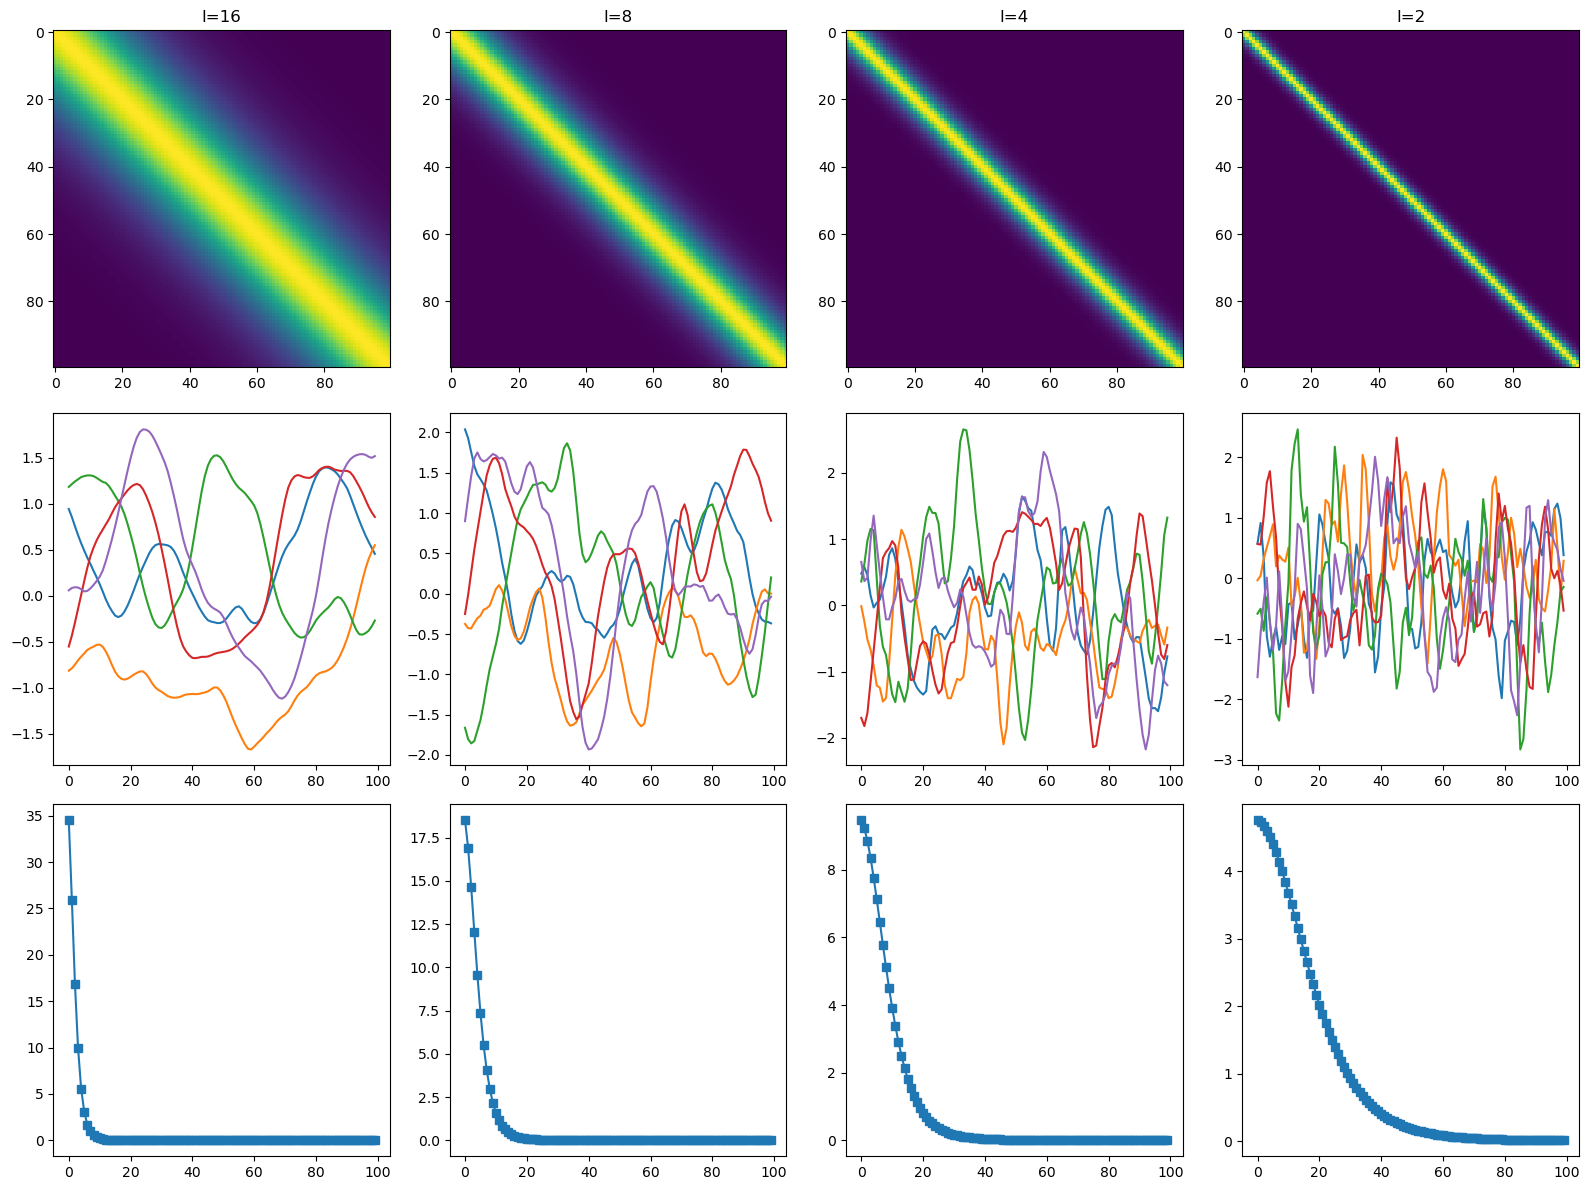

In [56]:
import numpy as np
import matplotlib.pyplot as plt



x = np.arange(100)

def cov_matern(d, loghyper, x):
    ell = np.exp(loghyper[0])
    sf2 = np.exp(2 * loghyper[1])    
    def f(t):
        if d == 1: return 1
        if d == 3: return 1 + t
        if d == 5: return 1 + t * (1 + t / 3)
        if d == 7: return 1 + t * (1 + t * (6 + t) / 15)       
    def m(t):
        return f(t) * np.exp(-t)   
    dist_sq = ((x[:, None] - x[None, :]) / ell) ** 2
    return sf2 * m(np.sqrt(d * dist_sq))


fig, axes = plt.subplots(3, 4, figsize=(16, 12))
fig.set_tight_layout(True)

z = np.random.randn(100,5)

k1 = cov_matern(5,[np.log(16),np.log(1)],x)
axes[0, 0].imshow(k1)
axes[0, 0].set_title('l=16')
[u,s,v] = np.linalg.svd(k1)
axes[1,0].plot(u@np.diag(np.sqrt(s))@z)
axes[2,0].plot(s,'-s')


k2 = cov_matern(5,[np.log(8),np.log(1)],x)
axes[0, 1].imshow(k2)
axes[0, 1].set_title('l=8')
[u,s,v] = np.linalg.svd(k2)
axes[1,1].plot(u@np.diag(np.sqrt(s))@z)
axes[2,1].plot(s,'-s')


k3 = cov_matern(5,[np.log(4),np.log(1)],x)
axes[0, 2].imshow(k3)
axes[0, 2].set_title('l=4')
[u,s,v] = np.linalg.svd(k3)
axes[1,2].plot(u@np.diag(np.sqrt(s))@z)
axes[2,2].plot(s,'-s')

k4 = cov_matern(5,[np.log(2),np.log(1)],x)
axes[0, 3].imshow(k4)
axes[0, 3].set_title('l=2')
[u,s,v] = np.linalg.svd(k4)
axes[1,3].plot(u@np.diag(np.sqrt(s))@z)
axes[2,3].plot(s,'-s')

fig.savefig('Matern5_SVD.pdf')

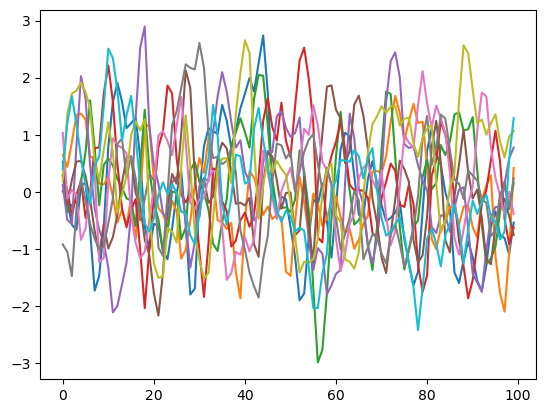

In [53]:
z.shape

